In [40]:
#aca voy a practicar generar grafos bipartitos con los datasets de mis correlaciones significativas
#la idea es extrapolar esto, con varias eseferas de complejidad como 0 , 1 ,...,n datasets para generar redes
#de interaccion complejas
import pandas as pd

import networkx as nx

df = pd.read_csv('/home/mariano/Documents/tomate/Tablas/paperLuisa/expancion2/CorrTodos/corrAnalizadas/parentales/Correlaciones_Parentales_Significativas_OR_Coeficientes_Negativos.csv')

print(df.shape)

df

(2, 9)


,Unnamed: 0,Unicidad,Locus,Coef_todos_OR,PVal_todos_OR,Coef_parentales_OR,PVal_parentales_OR,spotID,ProteinFunctionDescription
0,0,232,Solyc05g012070,-0.101274,0.795442,-0.898645,0.014889,JX337,UDP-glucose:protein transglucosylase-like protein
1,2,709,Solyc03g006860,-0.018349,0.962629,-0.828079,0.041795,JX015,Fructokinase


In [4]:
df.loc[0,'Locus']

'Solyc05g012070'

In [51]:
#como los edges de los grafos, devienen de tuplas donde aaprecen nodo (0) y nodo (1), y se puede agregar
#tipo diccionario, peso y color al estilo...
#<1 2 {'weight':7, 'color':'green'}>

def edges(df):
    lista_edges = []

    for fila in range(0,df.shape[0]):

        lista_edges.append((df.loc[fila,'Locus']+'_'+df.loc[fila,'spotID']+'_tran',df.loc[fila,'Locus']+'_'+df.loc[fila,'spotID']+'_prot', {'weight':df.loc[fila,'Coef_parentales_OR']}))
        
    return(lista_edges)

In [42]:
edges_ejemplo = edges(df)
print(edges_ejemplo)

[('Solyc05g012070_tran', 'Solyc05g012070_prot', {'weight': -0.898645105261295}), ('Solyc03g006860_tran', 'Solyc03g006860_prot', {'weight': -0.828078671210825})]


In [47]:
from networkx import bipartite

grafo = nx.Graph()#creo el grafo vacio

grafo.add_nodes_from(df['Locus']+'_tran',bipartite = 0)

grafo.add_nodes_from(df['Locus']+'_prot',bipartite = 1)

grafo.add_edges_from(edges_ejemplo)

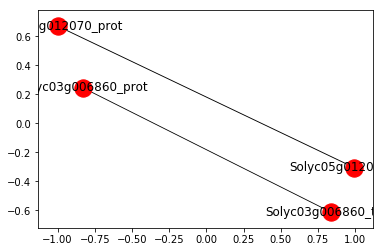

In [58]:
import matplotlib

nx.draw_networkx(grafo, width=df['Coef_parentales_OR'])

In [45]:
#como no me cierra la cisualizacion, l ovoy a inspeccionar con sus metodos

nx.is_bipartite(grafo)#creo que encontre el problema, no deberia pdoer llamar igual a los elementos del 0 y 1

True

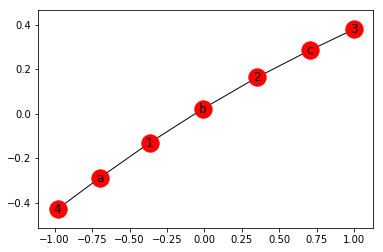

In [34]:
#oruebita falopa

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
nx.draw_networkx(B)
#con esto ya entendi, y confirme el problema del mismo nombre 0 y 1, ya que son conjuntos...

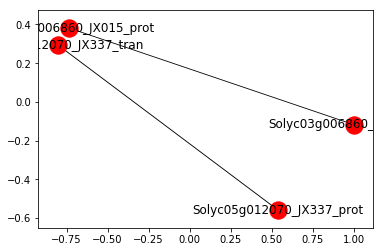

In [62]:
#armo funcion para generar grafos bipartitos, de forma generica, para no romper todo
#genero_bipartito podria mejorarse si le agrego escribir el string de la columna que agarra como weight
def genero_bipartito(df):
    
    '''requiere importar pandas as pd, networkx as nx'''
    
    grafo = nx.Graph()#creo el grafo vacio

    grafo.add_nodes_from(df['Locus']+'_'+df['spotID']+'_tran',bipartite = 0)

    grafo.add_nodes_from(df['Locus']+'_'+df['spotID']+'_prot',bipartite = 1)

    grafo.add_edges_from(edges(df))
    
    return(grafo)

def grafico_grafo(grafo,df):
    
    '''requiere importar networkx as nx'''
    
    return(nx.draw_networkx(grafo,width=df['Coef_parentales_OR']))

grafico_grafo(genero_bipartito(df),df)